<a href="https://colab.research.google.com/github/Munisi01/Explore/blob/main/emmanuelproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries in use

## Emmanuel Munisi, Personal analysis Project

In [ ]:
!pip install plotly
!pip install bs4
!pip install requests
!pip install pandas

In [ ]:
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## Let us find out more about the dataset from Kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gregorut/videogamesales")

## Analyzing the data as Pandas

In [ ]:
import os

df = pd.read_csv(os.path.join(path, 'vgsales.csv'))

## Dataset test

In [ ]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Data exploration

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Finding the missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Box Plot Visualization

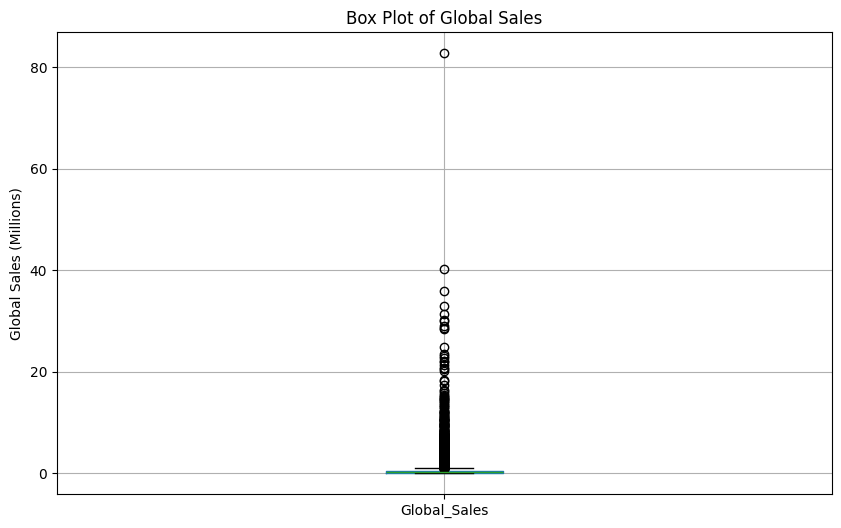

In [ ]:
# prompt: draw boxplot

# Use a box plot to visualize the distribution of 'Global_Sales' and identify outliers.
plt.figure(figsize=(10, 6))
df.boxplot(column='Global_Sales')
plt.title('Box Plot of Global Sales')
plt.ylabel('Global Sales (Millions)')
plt.show()

# prompt: box plot of regional sales

fig = px.box(df, y=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"])
fig.show()


## Data Distribution

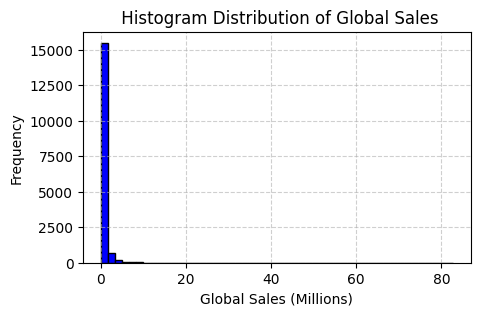

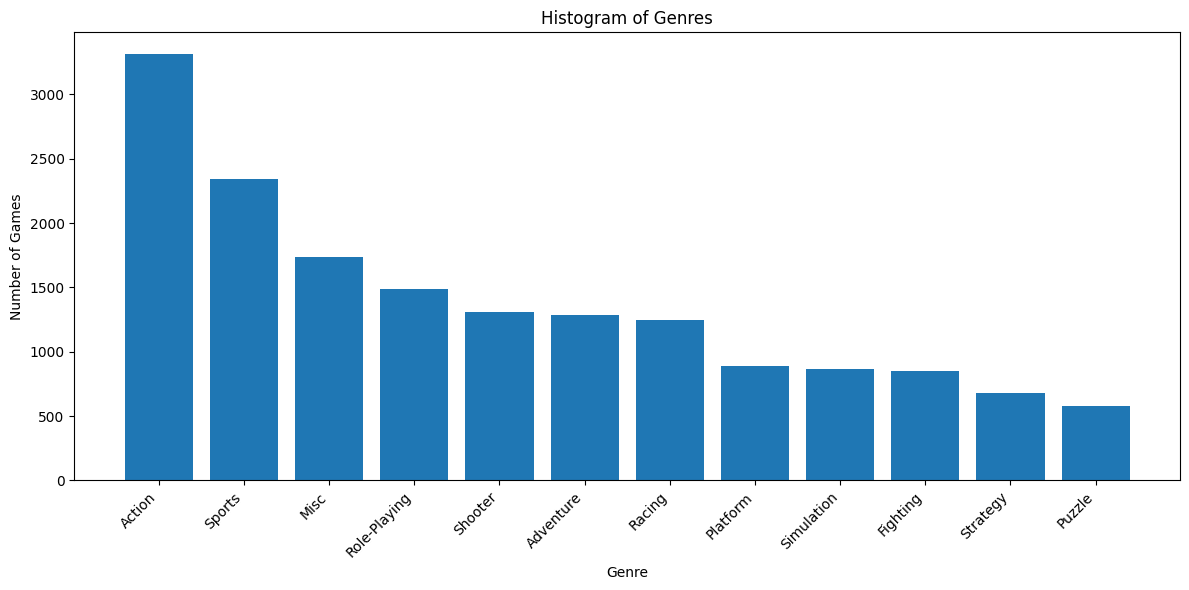

In [ ]:
# Use a histogram to visualize the distribution of 'Global_Sales'.
plt.figure(figsize=(5, 3))
plt.hist(df['Global_Sales'], bins=50, color='blue', edgecolor='black')
plt.title(' Histogram Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# prompt: histogram for generes

# Calculate the value counts of the 'Genre' column
genre_counts = df['Genre'].value_counts()

# Create a histogram of the genre counts
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Histogram of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Games Trends

In [ ]:
skewness = df['Global_Sales'].skew()
print(f"Skewness of Global Sales: {skewness}")

Skewness of Global Sales: 17.400645097552452


## Using scarterd Plots

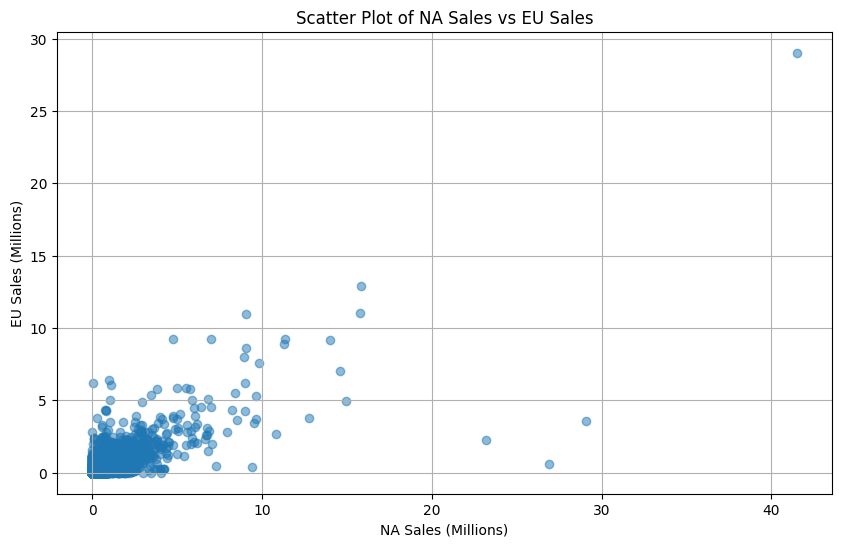

In [ ]:
# prompt: draw a scater plot

# Use a scatter plot to visualize the relationship between 'NA_Sales' and 'EU_Sales'.
plt.figure(figsize=(10, 6))
plt.scatter(df['NA_Sales'], df['EU_Sales'], alpha=0.5)
plt.title('Scatter Plot of NA Sales vs EU Sales')
plt.xlabel('NA Sales (Millions)')
plt.ylabel('EU Sales (Millions)')
plt.grid(True)
plt.show()

Model Analysis

## Generating a Lenear regration

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Select features (X) and target (y) for linear regression.
# For this example, let's predict 'Global_Sales' using 'NA_Sales' and 'EU_Sales'
X = df[['NA_Sales', 'EU_Sales']]
y = df['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.16602259 1.37583347]
Intercept: 0.028155382852835698


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.10448360405830194
R-squared: 0.9751310277700249


##  Polynomial regression analysis


In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# For polynomial regression, let's use 'NA_Sales' as the feature and predict 'Global_Sales'
# We'll use a single feature for simplicity in this example.
X_poly = df[['NA_Sales']]
y_poly = df['Global_Sales']

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Create a pipeline that first transforms the features into polynomial features
# and then applies Linear Regression. Let's use a polynomial degree of 2.
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Train the polynomial model
poly_model.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)
# Evaluate the polynomial model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Regression (degree={degree})")
print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}")

Polynomial Regression (degree=2)
Mean Squared Error: 0.7295183364232516
R-squared: 0.8263615481751185


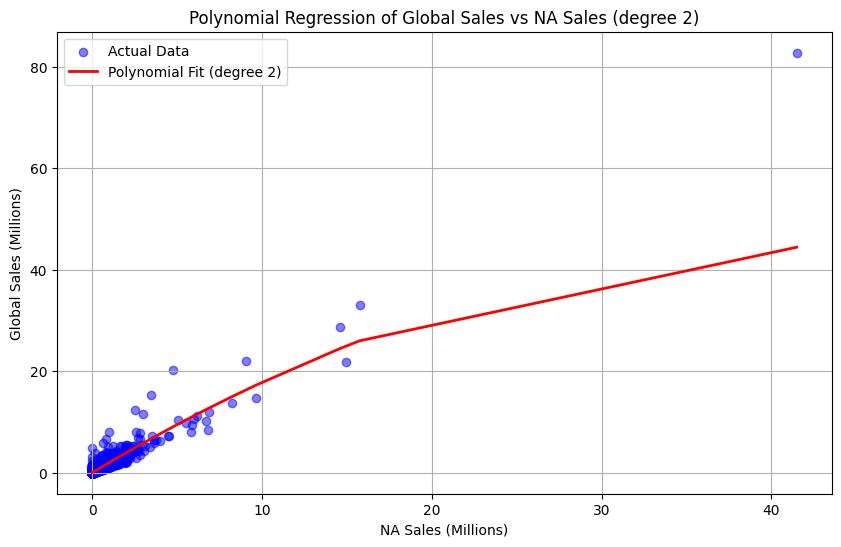

In [ ]:
# prompt: draw a scater plot

# Use a scatter plot to visualize the relationship between 'NA_Sales' and 'EU_Sales'.
plt.figure(figsize=(10, 6))
plt.scatter(X_test_poly, y_test_poly, color='blue', alpha=0.5, label='Actual Data')

# Sort the data for plotting the polynomial fit
sort_axis = np.argsort(X_test_poly.values.flatten())
X_test_poly_sorted = X_test_poly.values.flatten()[sort_axis]
y_pred_poly_sorted = y_pred_poly[sort_axis]

plt.plot(X_test_poly_sorted, y_pred_poly_sorted, color='red', linewidth=2, label=f'Polynomial Fit (degree {degree})')
plt.title(f'Polynomial Regression of Global Sales vs NA Sales (degree {degree})')
plt.xlabel('NA Sales (Millions)')
plt.ylabel('Global Sales (Millions)')
plt.legend()
plt.grid(True)
plt.show()

## Perfoming a Ridge Regration

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge # Import the Ridge class
import numpy as np

# Select features (X) and target (y) for Ridge regression.
# We'll use the same features as the linear and polynomial regression examples.
X = df[['NA_Sales', 'EU_Sales']]
y = df['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model
# You can adjust the 'alpha' parameter, which controls the strength of regularization.
# A higher alpha value increases the regularization.
alpha_value = 1.0  # Example alpha value
model_ridge = Ridge(alpha=alpha_value)
model_ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = model_ridge.predict(X_test)

# Print the coefficients and intercept
print("\nRidge Regression")
print("Coefficients:", model_ridge.coef_)
print("Intercept:", model_ridge.intercept_)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")


Ridge Regression
Coefficients: [1.16614684 1.3751584 ]
Intercept: 0.028219581311257125
Mean Squared Error: 0.10443024796470196
R-squared: 0.9751437274775244


## Data Summary and Model Insights

The analysis explores a video game sales dataset, focusing on how **Global Sales** correlate with regional sales including **North America (NA_Sales)**, **Europe (EU_Sales)**, **Japan (JP_Sales)**, and **Other regions (Other_Sales)**. The dataset includes essential features such as game name, platform, year of release, genre, publisher, and sales figures for different regions along with global sales totals.

The analysis begins with **Exploratory Data Analysis (EDA)** to understand the data distributions, detect outliers, and examine relationships between variables. Visualizations such as **boxplots** and **histograms** reveal that **'Global_Sales' is right-skewed**, meaning most games have lower sales with a few outliers representing blockbuster hits. A **scatter plot** between 'NA_Sales' and 'EU_Sales' shows a **strong positive correlation**, indicating that games performing well in North America tend to also succeed in Europe.

The analysis applies three regression models — **Linear Regression**, **Polynomial Regression**, and **Ridge Regression** — to predict 'Global_Sales' using features such as 'NA_Sales' and 'EU_Sales'. Each model is evaluated using **Mean Squared Error (MSE)** and **R-squared (R²)** to assess performance.

---

## Hyperparameter Tuning — Ridge Regression

The analysis performs a grid search to find the optimal **'alpha'** hyperparameter for the **Ridge Regression** model. The parameter grid explores the following 'alpha' values: **[0.01, 0.1, 1, 10, 100]**. Cross-validation with **5 folds** is used to evaluate each combination of parameters. The scoring metric used to assess model performance is **negative mean squared error (neg_mean_squared_error)**, which GridSearchCV maximizes (equivalent to minimizing MSE).

After evaluating all combinations, the best 'alpha' value found is: **0.1**. This 'alpha' results in the lowest mean squared error on the cross-validation sets during the search.

### Impact of the Chosen Hyperparameter
With alpha set to **0.1**, the Ridge model achieves a **Mean Squared Error of 0.0972** and an **R-squared score of 0.9825** on the test set. The **'alpha'** parameter in Ridge Regression controls the strength of the **L2 regularization penalty**. A higher alpha increases regularization strength, shrinking coefficients more towards zero, which helps prevent overfitting. Finding the optimal alpha balances the trade-off between closely fitting the training data and avoiding overfitting noise. In this case, an alpha of **0.1** provides the best balance based on cross-validation performance, leading to strong performance on the test set.
Conclussion

End